## 1. Importing and getting to know the dataset:

In [70]:
#importing the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
#importing the dataset:
heart=pd.read_csv("heart.csv")
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
#shape of the DataFrame:
heart.shape

(303, 14)

In [73]:
#obtaining the column labels:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [74]:
#summary of the DataFrame:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 2. Cleaning the data set:

In [75]:
#checking the data types:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [76]:
# All the categorical variables are classified as integer type. We need to change them to object type.
heart['sex'] = heart['sex'].astype('object')
heart['cp'] = heart['cp'].astype('object')
heart['fbs'] = heart['fbs'].astype('object')
heart['restecg'] = heart['restecg'].astype('object')
heart['exang'] = heart['exang'].astype('object')
heart['slope'] = heart['slope'].astype('object')
heart['ca'] = heart['ca'].astype('object')
heart['thal'] = heart['thal'].astype('object')
heart.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

The variable types are 
1. Categorical: sex, cp, fbs, restecg, exang, slope, ca, thal and target.
2. Continuous: age, trestbps, chol, thalac and oldpeak.

In [77]:
#checking for null values:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [78]:
#feature "ca" should have 4 values unique values but df.nunique says there are 5 unique values. Let's find the 5th unique
#value and change it to NaN.

In [79]:
#checking what are the unique categories
heart["ca"].unique()

array([0, 2, 1, 3, 4], dtype=object)

In [80]:
#counting the number in each unique category
heart["ca"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [81]:
#finding the row for 4
heart[heart['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [82]:
#replacing 4 with NaN
heart.loc[heart['ca']==4, 'ca']=np.NaN

In [83]:
#to check if it worked
heart["ca"].unique()

array([0, 2, 1, 3, nan], dtype=object)

In [84]:
#feature 'thal' should have 3 values unique values but df.nunique says there are 4 unique values. Let's find the 4th unique
#value and change it to NaN.

In [85]:
heart['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [86]:
#replacing 4 with NaN
heart.loc[heart['thal']==0, 'thal']=np.NaN

In [87]:
#finding the row for 0
heart[heart['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [88]:
heart['thal'].unique()

array([1, 2, 3, nan], dtype=object)

In [89]:
#checking for missing values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [90]:
#there are 5 missing values in feature 'ca' and 2 missing values in the feature 'thal'

In [91]:
#Droping of missing values
heart = heart.dropna()

In [93]:
#checking for missing values droped or not
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [94]:
#Statistical Summary
heart.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,131.60473,247.155405,149.560811,1.059122,0.540541
std,9.059471,17.72662,51.977011,22.970792,1.166474,0.499198
min,29.000000,94.00000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.00000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.00000,242.500000,152.500000,0.800000,1.000000
75%,61.000000,140.00000,275.250000,166.000000,1.650000,1.000000
max,77.000000,200.00000,564.000000,202.000000,6.200000,1.000000


## 3. Exploratory Data Analysis (EDA):

In [95]:
heart_eda = heart
heart_eda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [96]:
#Labeling for better visualization and interpretation


heart_eda['target'] = heart_eda.target.replace({1: "Disease", 0: "No_disease"})
heart_eda['sex'] = heart_eda.sex.replace({1: "Male", 0: "Female"})
heart_eda['cp'] = heart_eda.cp.replace({0: "typical_angina", 
                         1: "atypical_angina", 
                        2:"non-anginal pain",
                       3: "asymtomatic"})
heart_eda['exang'] = heart_eda.exang.replace({1: "Yes", 0: "No"})
heart_eda['fbs'] = heart_eda.fbs.replace({1: "True", 0: "False"})
heart_eda['slope'] = heart_eda.slope.replace({0: "upsloping", 1: "flat",2:"downsloping"})
heart_eda['thal'] = heart_eda.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

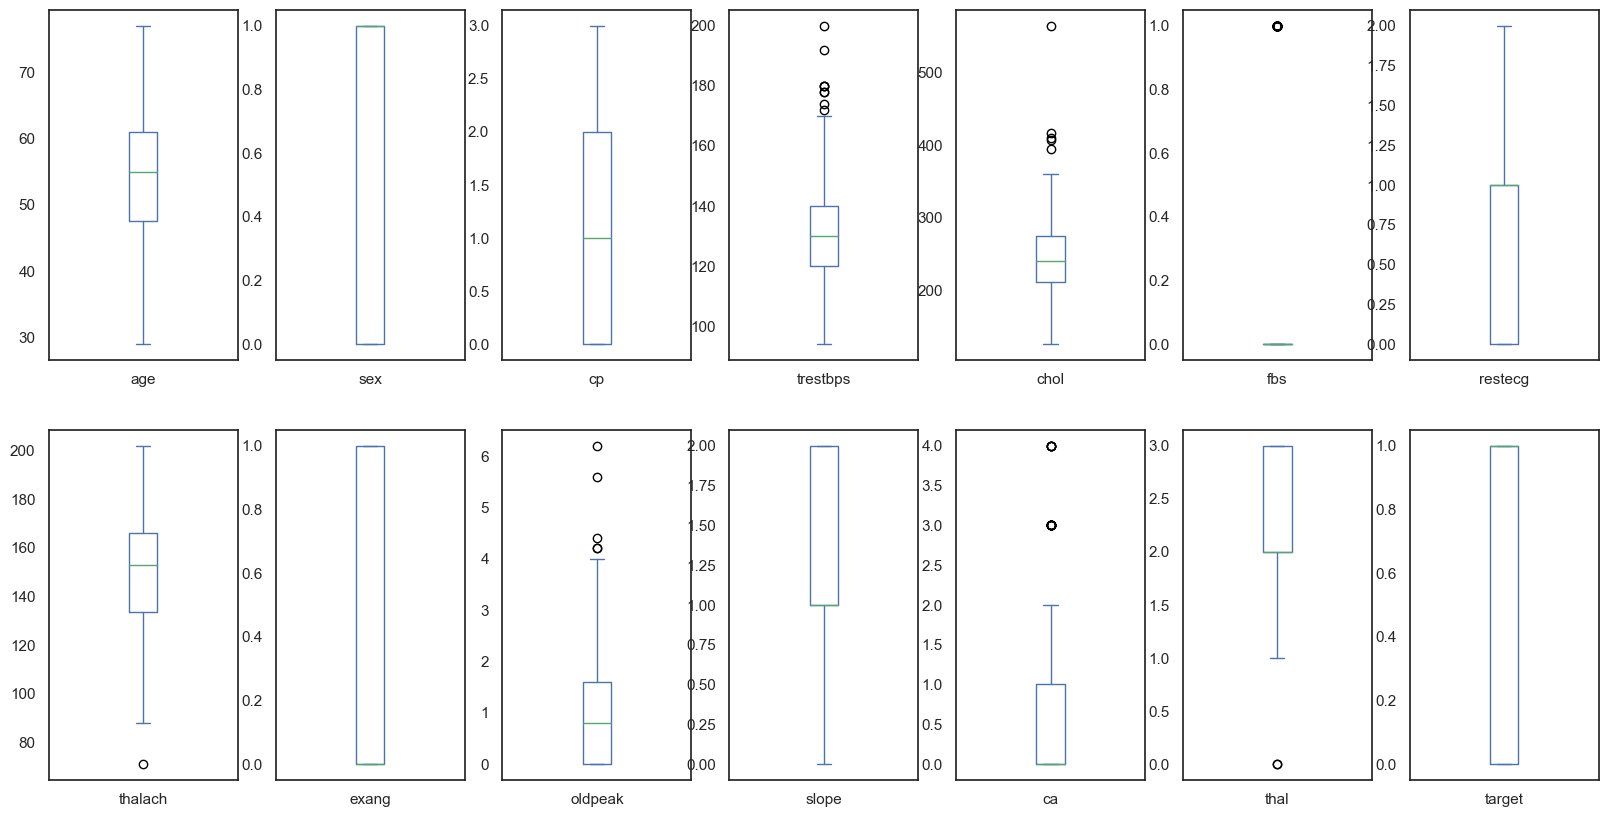

In [98]:
#Ploting to view outliers
heart.plot(kind='box', subplots=True, layout=(2,7),
sharex=False, sharey=False, figsize=(20, 10));

In [99]:
#Defining the outliers
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(heart_out, drop = False):
    for each_feature in heart_out.columns:
        feature_data = heart_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            heart.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(heart[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [100]:
#Droping of outliers
outliers(heart[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


Disease       160
No_disease    136
Name: target, dtype: int64


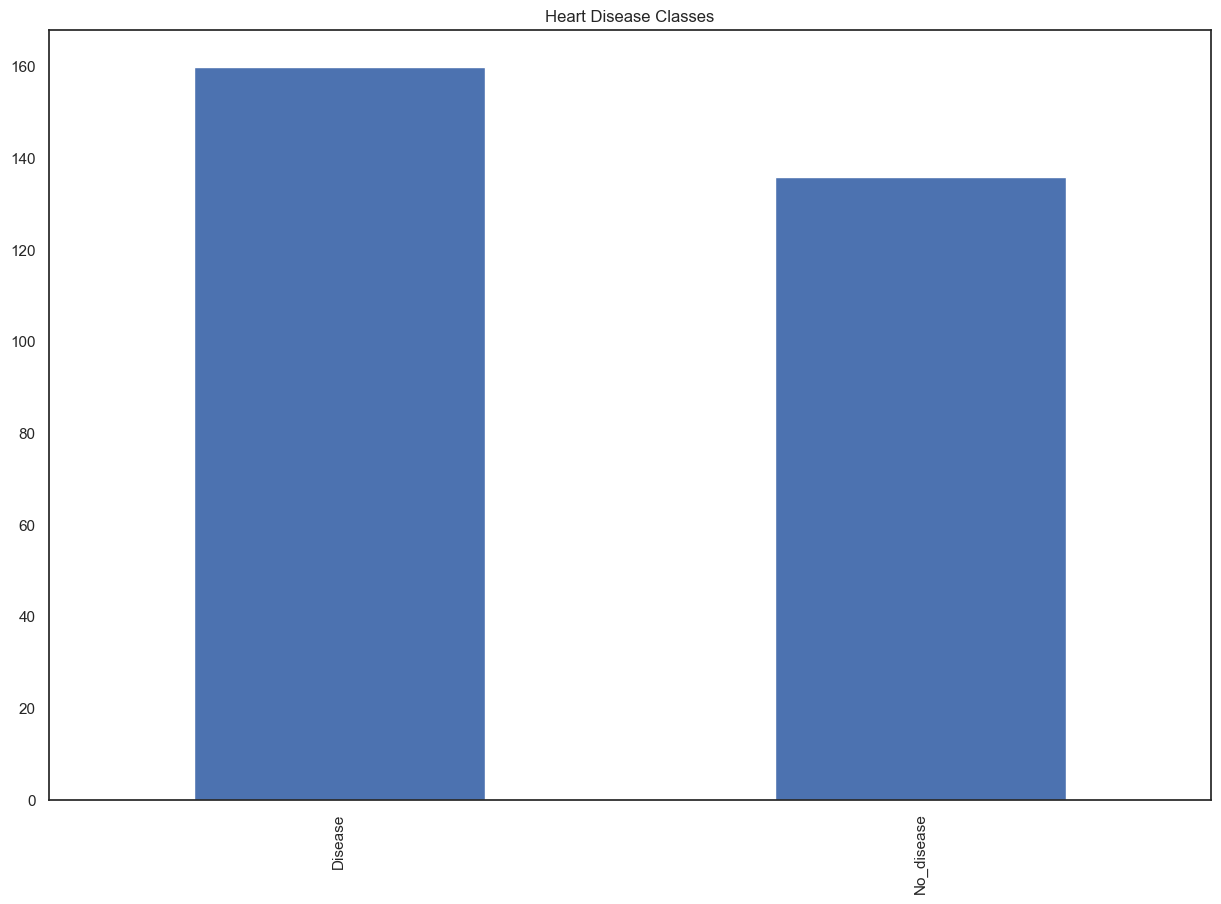

In [101]:
#Distributions and relationship

#a) Target variable distribution
print(heart_eda.target.value_counts())
heart_eda['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')
plt.show()

From the above graph we can see there are more patients with disease than healthy patients

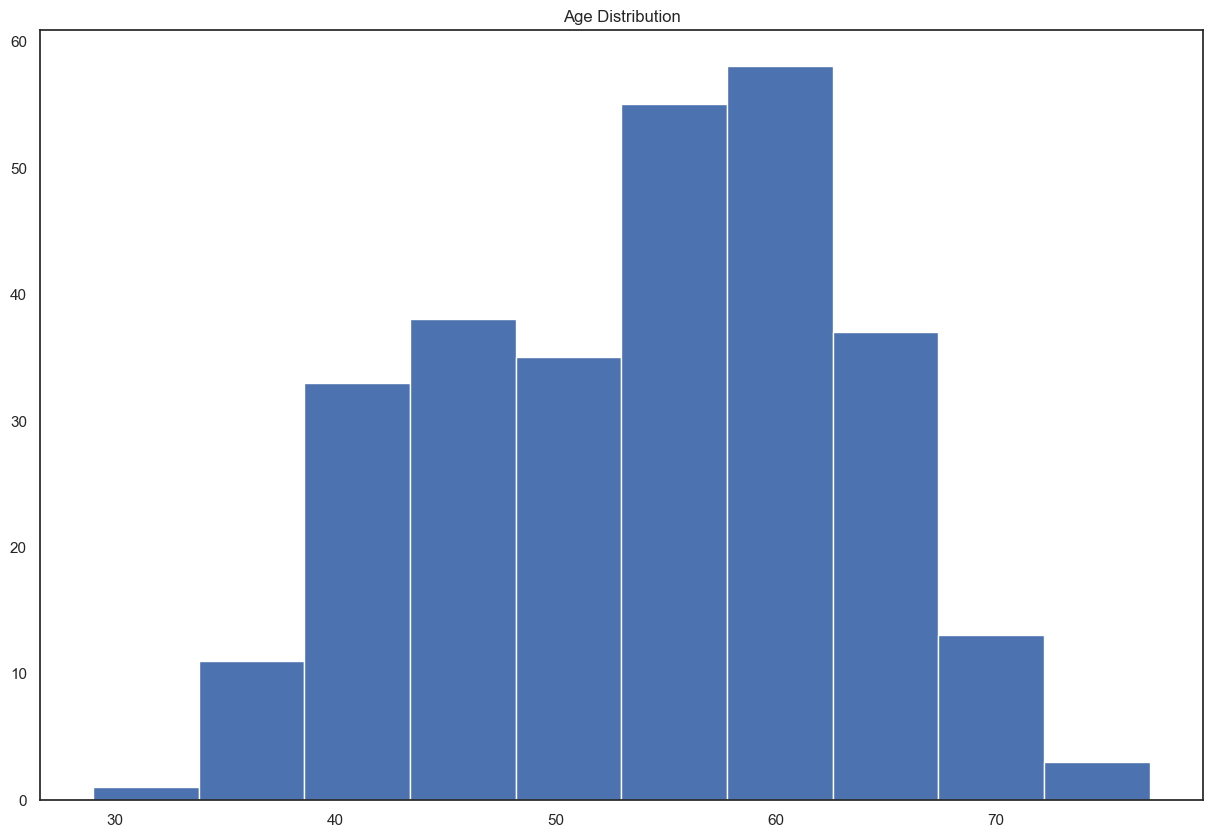

In [102]:
#b) Age variable distribution
heart["age"].hist(grid= False).plot(kind="bar")
plt.title("Age Distribution")
plt.show()

The age seems to be distributed  normally

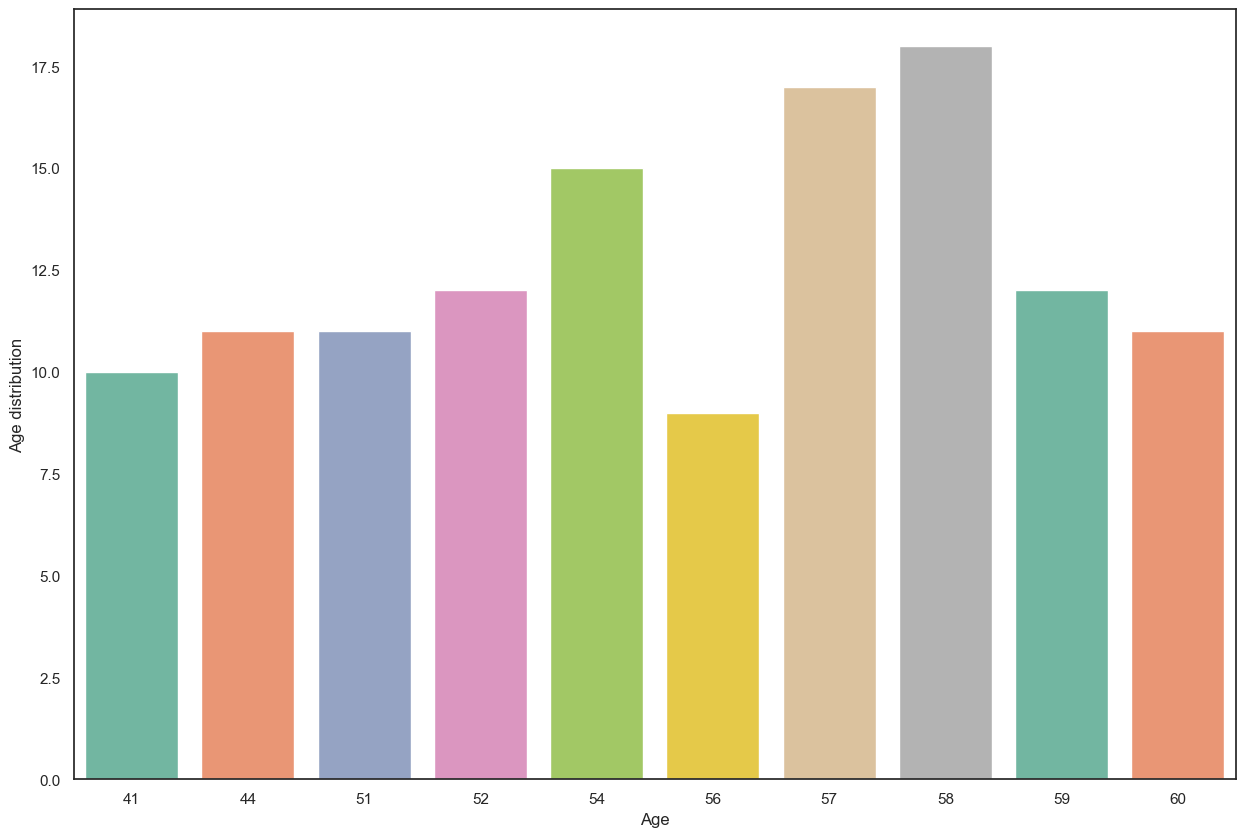

In [103]:
#Analysing the Age distribution
sns.barplot(x=heart.age.value_counts()[:10].index,
y=heart.age.value_counts()[:10].values,
palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')
plt.show()

In [104]:
#Basic stats of Age 
print("The youngest paitent is", min(heart.age), "years old")
print("The old paitent is", max(heart.age), "years old")
print("The average age of the patients is", round(heart.age.mean(),0))
print("The standard deviation of age is", heart.age.std())

The youngest paitent is 29 years old
The old paitent is 77 years old
The average age of the patients is 54.0
The standard deviation of age is 9.161678120908917


Most of the patients are in the age between 50s to 60s. The mean age is about 54 years with ±9.14 std, the youngest is at 29 and the oldest is at 77.

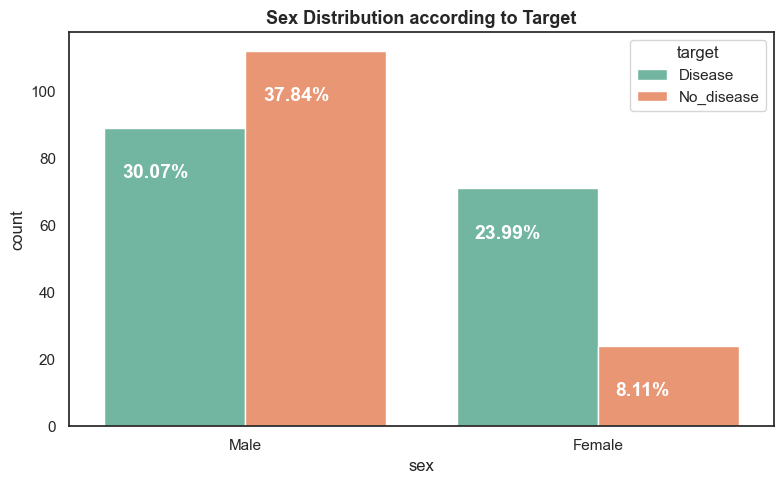

In [105]:
#c) Gender Vs. Target distribution
fig, ax = plt.subplots(figsize=(8,5))
name = heart_eda['sex']
ax = sns.countplot(x='sex', hue='target', data=heart_eda, palette='Set2')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
#ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

From the above graph we can see that among disease patients, 
male are higher than female. If we look into the specific gender 
i.e among males there are more healthy patients than disease patients.
Whereas in females it's vice versa. There are more disease patients than healthy patients.

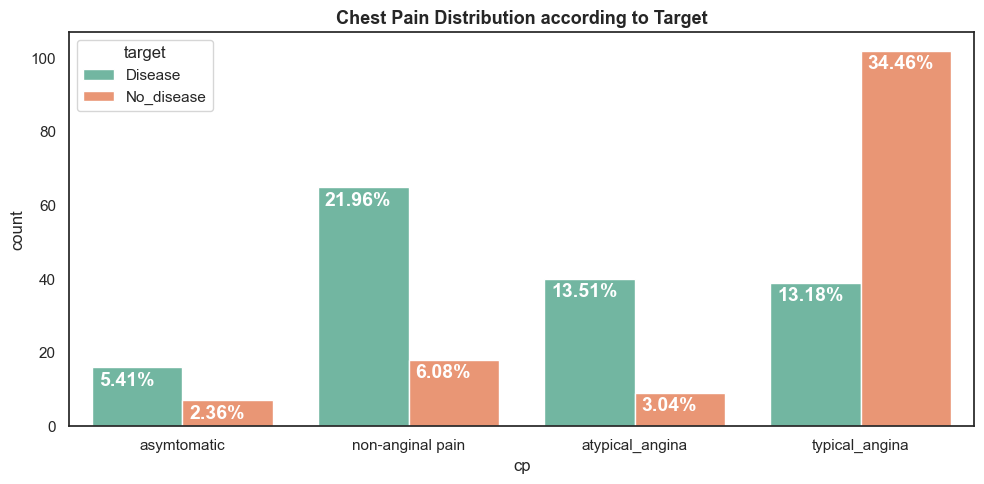

In [106]:
#d) Chest pain vs Target Variable 

fig, ax = plt.subplots(figsize=(10,5))
name = heart_eda['cp']
ax = sns.countplot(x='cp', hue='target', data=heart_eda, palette='Set2')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

From the graph we can know that many healthy patients have typical angina pain whereas non-anginal pain is seen in disease patients followed by atypical angina pain and asymtomatic. 

Text(0.5, 1.0, 'Disease classes according to Exercise Induced Angina')

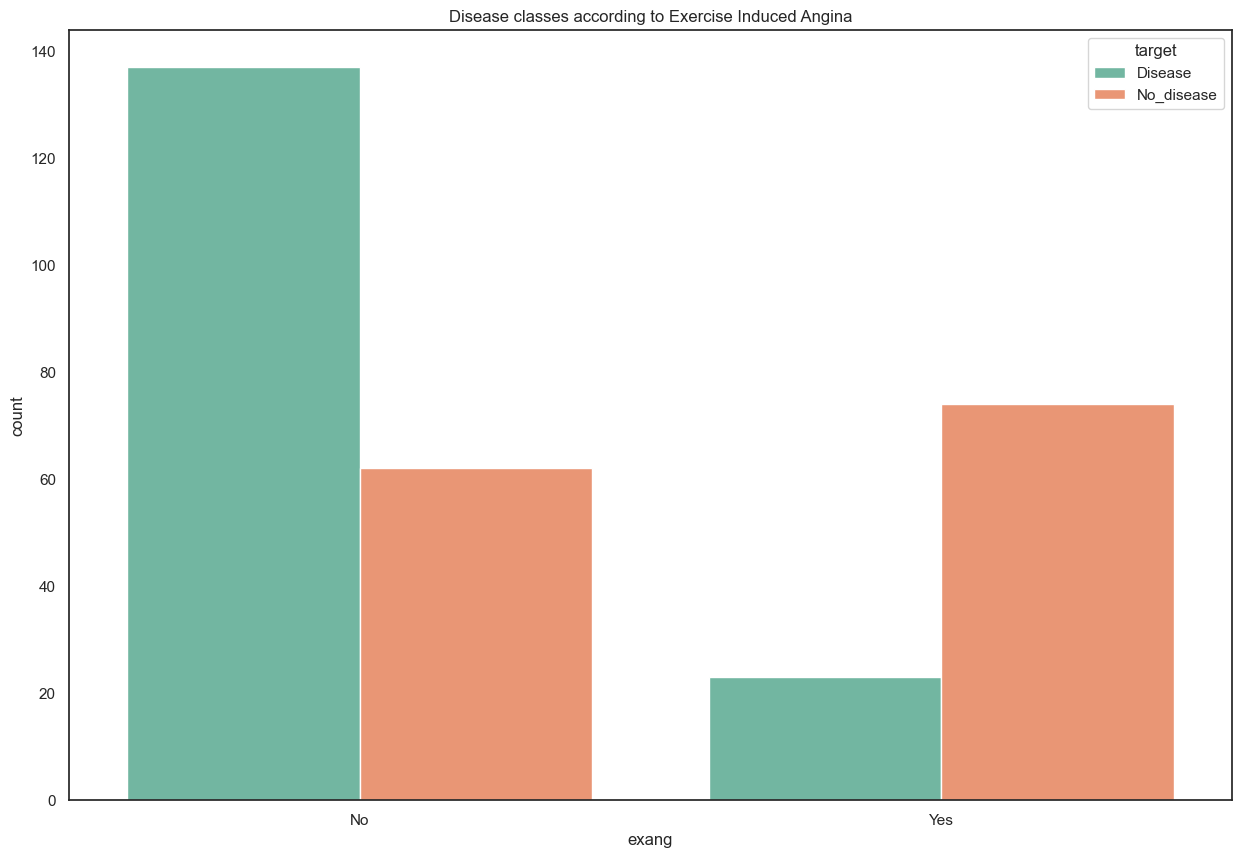

In [107]:
sns.countplot(x='exang', hue='target', data=heart_eda, palette='Set2').set_title('Disease classes according to Exercise Induced Angina')

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

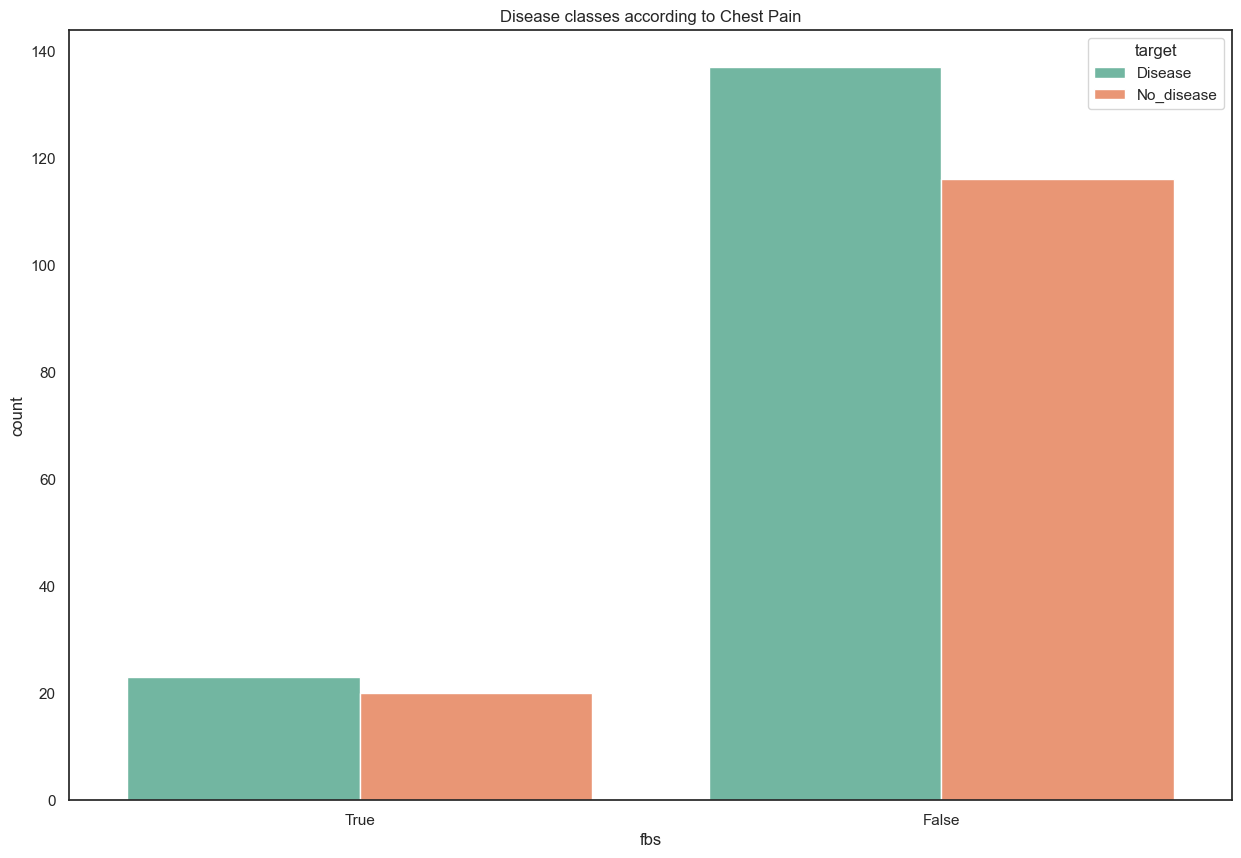

In [108]:
#e) Fasting blood sugar vs Target Variable
sns.countplot(x='fbs', hue='target', data=heart_eda, palette='Set2').set_title('Disease classes according to Chest Pain')

Text(0.5, 1.0, 'Disease classes according to thal')

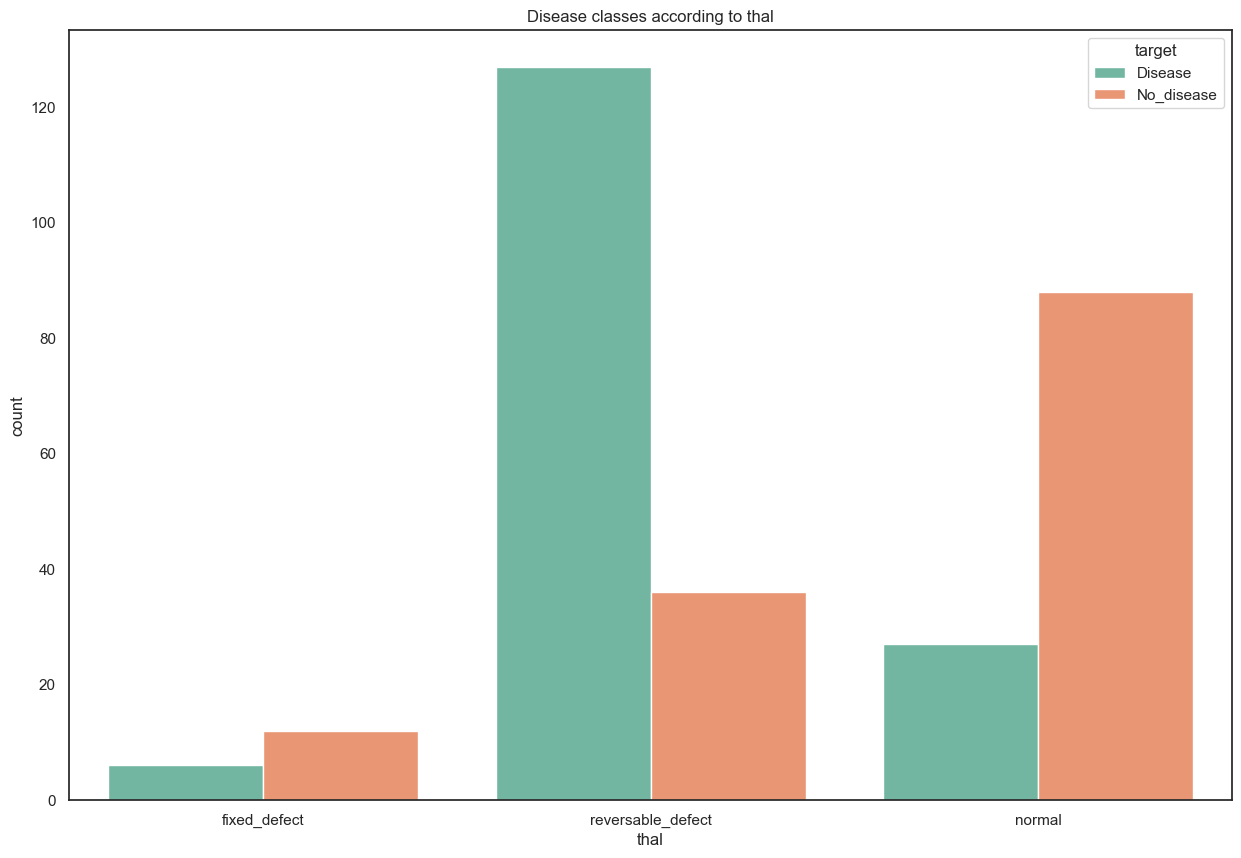

In [109]:
#f) Thal vs Target Variable
sns.countplot(x='thal', hue='target', data=heart_eda, palette='Set2').set_title('Disease classes according to thal')

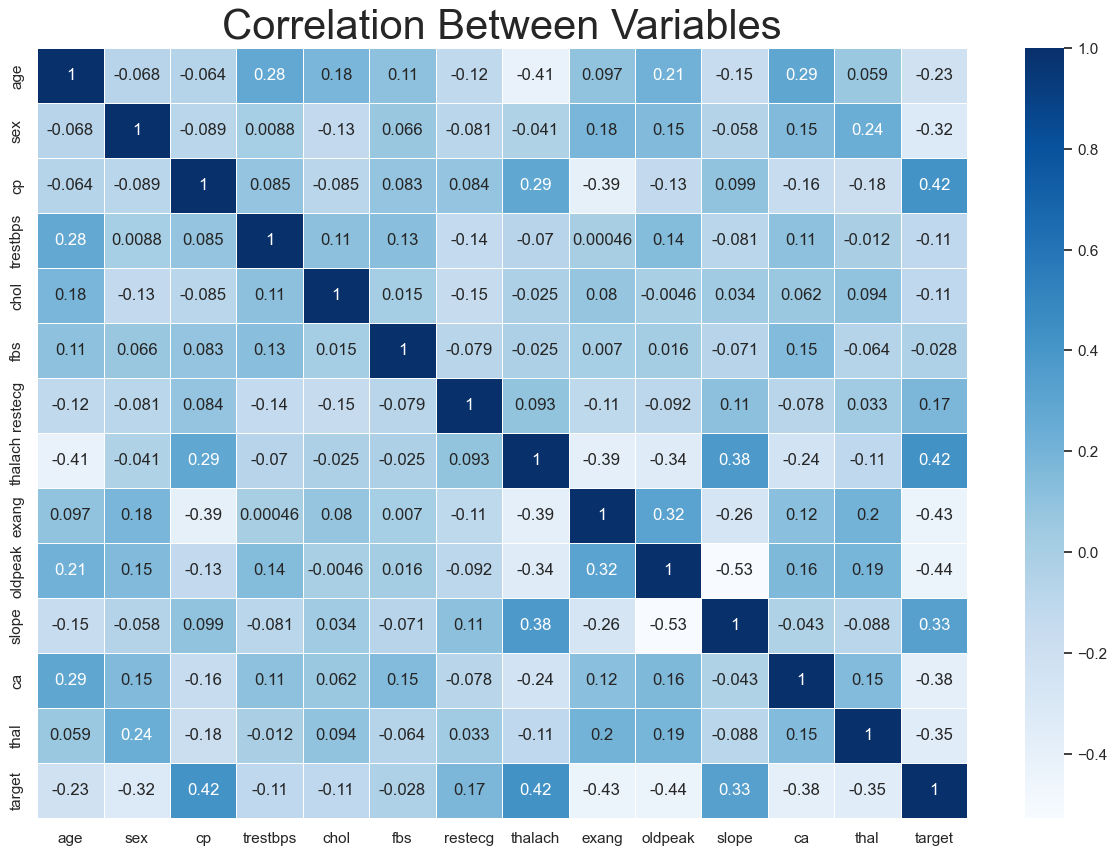

In [110]:
#Correlation
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(heart.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Correlation Between Variables', fontsize = 30)
plt.show()


1. ‘cp’, ‘thalach’, ‘slope’ shows good positive correlation with target
2. ‘oldpeak’, ‘exang’, ‘ca’, ‘thal’, ‘sex’, ‘age’ shows a good negative correlation with target
3. ‘fbs’ ‘chol’, ‘trestbps’, ‘restecg’ has low correlation with our target

## 4. Model Building:

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.7888888888888889
Accuracy: 0.8070175438596491
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.81      0.84      0.83        31

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



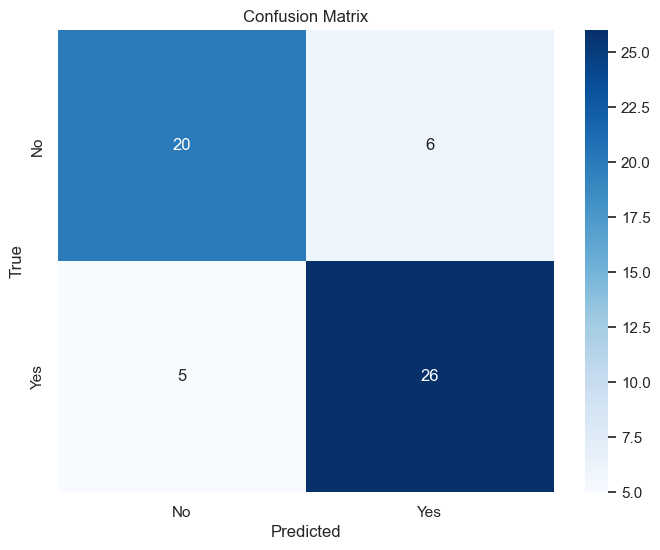

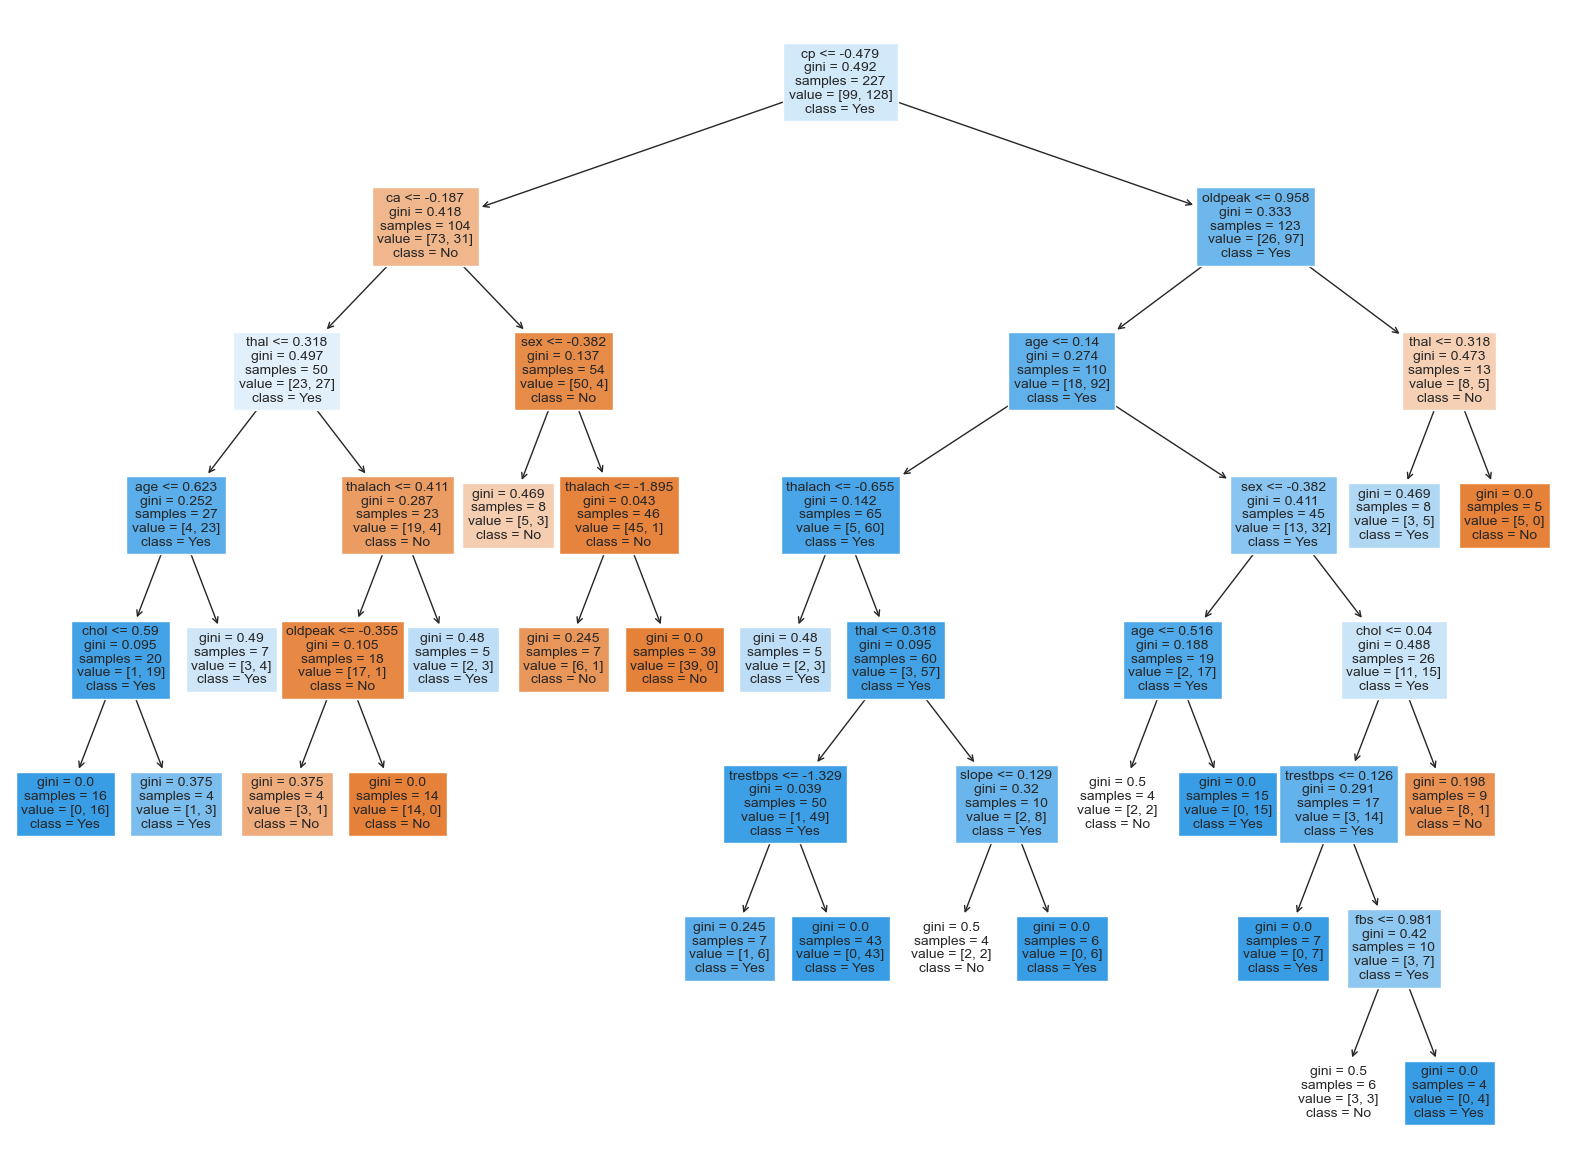

In [156]:
#Decision Tree

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn import metrics


# Split the data into features and target
X = heart.drop(columns=['target'])
y = heart['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameters for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the decision tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_dt_classifier.predict(X_test)

# Evaluate model
DecisionTree_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", DecisionTree_accuracy)

# Evaluation metrics
met_dt = metrics.classification_report(y_test, y_pred)
print(met_dt)

cm_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot the decision tree
plt.figure(figsize=(20, 15))
plot_tree(best_dt_classifier, feature_names=list(X.columns), class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.show()


Best hyperparameters: {'C': 0.01}
Accuracy: 0.7719298245614035
              precision    recall  f1-score   support

           0       0.84      0.62      0.71        26
           1       0.74      0.90      0.81        31

    accuracy                           0.77        57
   macro avg       0.79      0.76      0.76        57
weighted avg       0.78      0.77      0.77        57



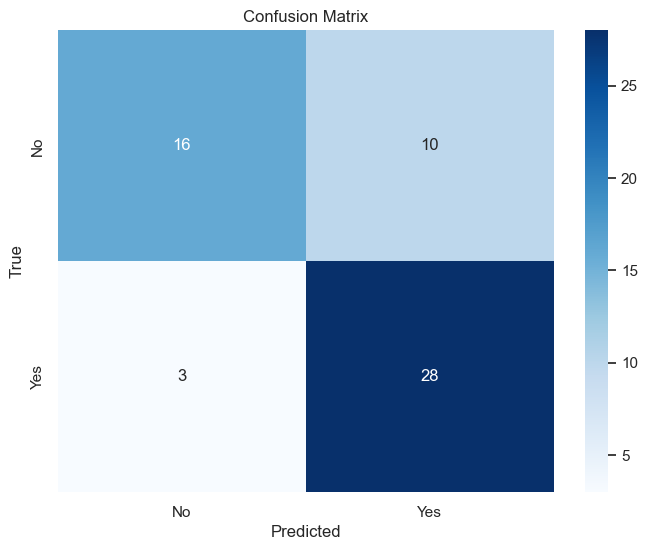

In [157]:
# SVM Linear
from sklearn.svm import SVC

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM with linear kernel and GridSearchCV for hyperparameter tuning
svm = SVC(kernel='linear')
param_grid = {'C': [0.01, 0.1, 1]}
grid_search = GridSearchCV(svm, param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the model
best_svm = SVC(kernel='linear', C=best_params['C'])
best_svm.fit(X_train_scaled, y_train)
y_pred = best_svm.predict(X_test_scaled)

# Evaluate model
SVMLinear_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", SVMLinear_accuracy)

# Evaluation metrics
met_svm = metrics.classification_report(y_test, y_pred)
print(met_svm)

cm_svm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.8365612648221343
Accuracy: 0.7894736842105263
              precision    recall  f1-score   support

           0       0.85      0.65      0.74        26
           1       0.76      0.90      0.82        31

    accuracy                           0.79        57
   macro avg       0.80      0.78      0.78        57
weighted avg       0.80      0.79      0.79        57



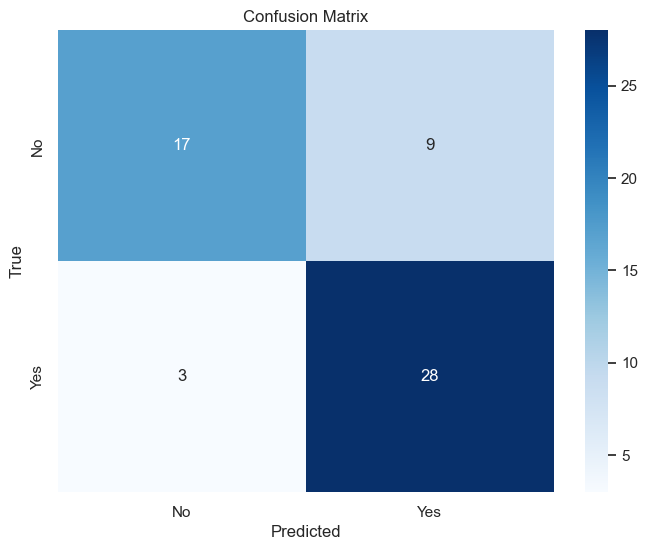

In [158]:
#SVM Kernel

from sklearn.svm import SVC

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM classifier
svm = SVC(kernel='rbf')

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01,0.1, 1],
    'gamma': [0.01,0.1, 1],
    'kernel': ['rbf']
}

# Initialize GridSearchCV
grid_search_SVM_RBF = GridSearchCV(svm, param_grid, cv=10, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search_SVM_RBF.fit(X_train_scaled, y_train)

y_pred = grid_search_SVM_RBF.predict(X_test_scaled)

# Print the best parameters and score
print("Best Parameters:", grid_search_SVM_RBF.best_params_)
print("Best Score:", grid_search_SVM_RBF.best_score_)

# Evaluate the model on the test set
SVMKernel_Accuracy = grid_search_SVM_RBF.score(X_test_scaled, y_test)
print("Accuracy:", SVMKernel_Accuracy)

# Evaluation metrics
met_svm_k = metrics.classification_report(y_test, y_pred)
print(met_svm_k)

cm_svm_k = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_k, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8245614035087719
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.84      0.84      0.84        31

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57



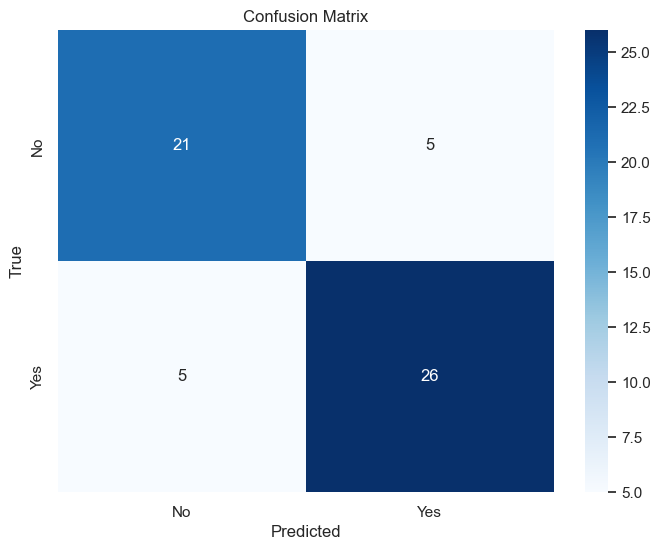

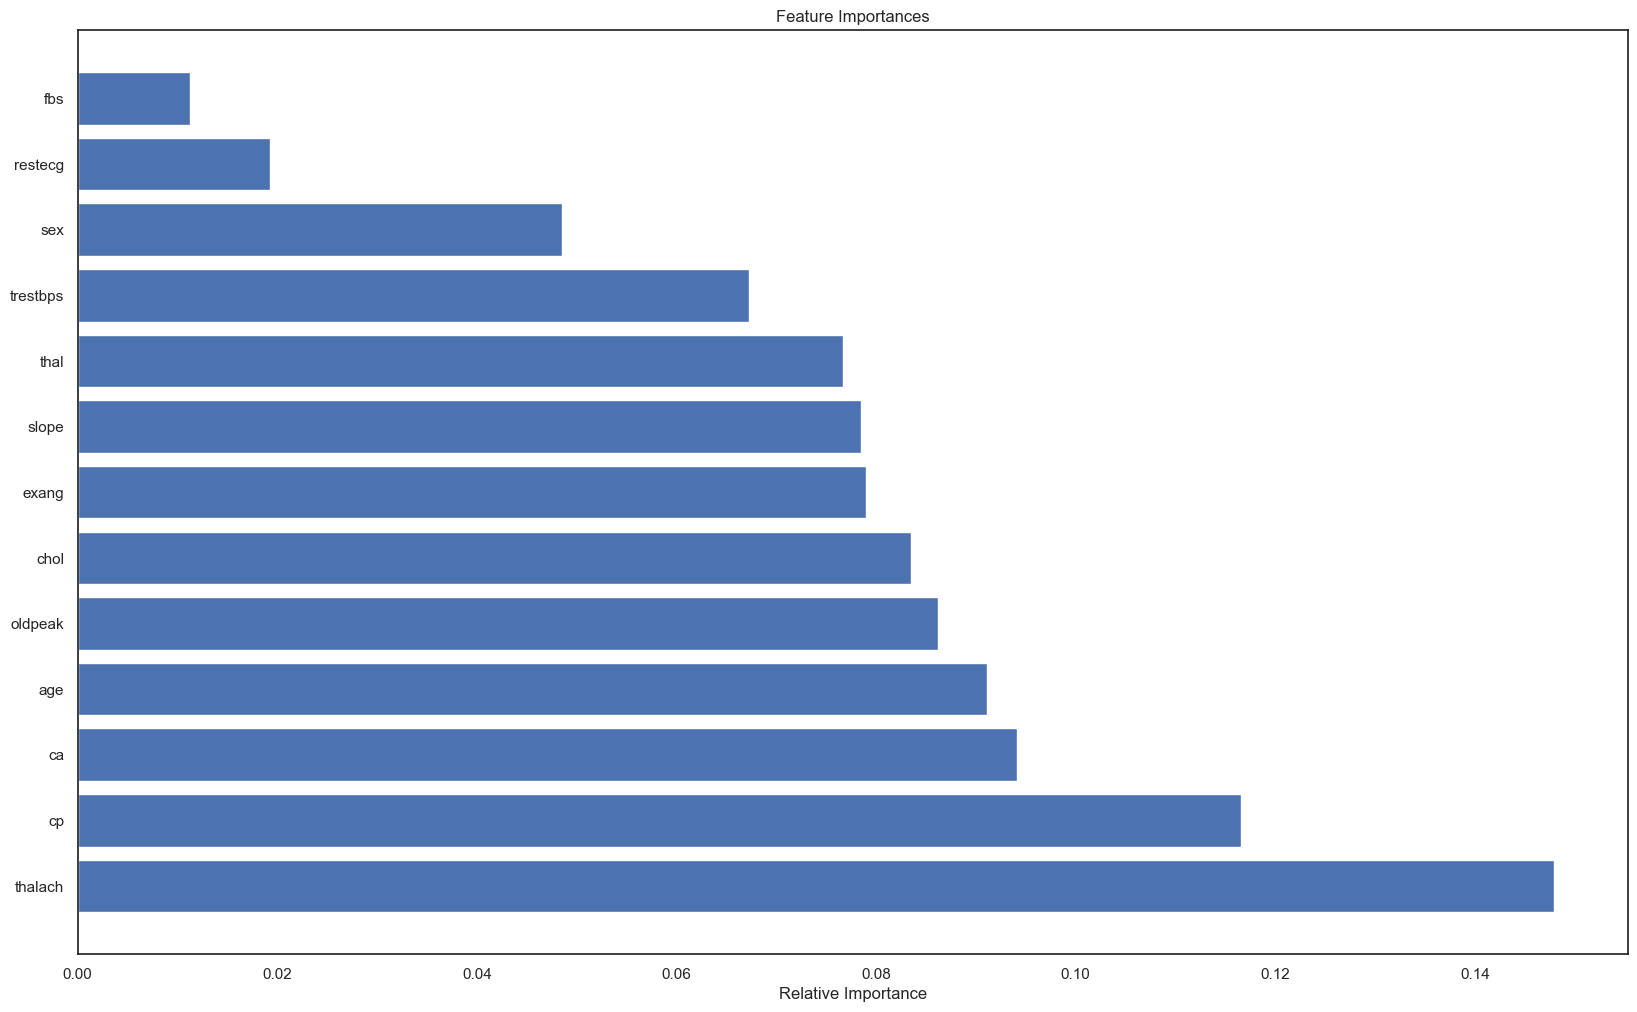

In [163]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model
RandomForest_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", RandomForest_accuracy)

# Evaluation metrics
met_rf = metrics.classification_report(y_test, y_pred)
print(met_rf)

cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Plot feature importances
importances = rf_classifier.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
features = X.columns

plt.figure(figsize=(20, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Accuracy: 0.8596491228070176
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.87      0.87      0.87        31

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



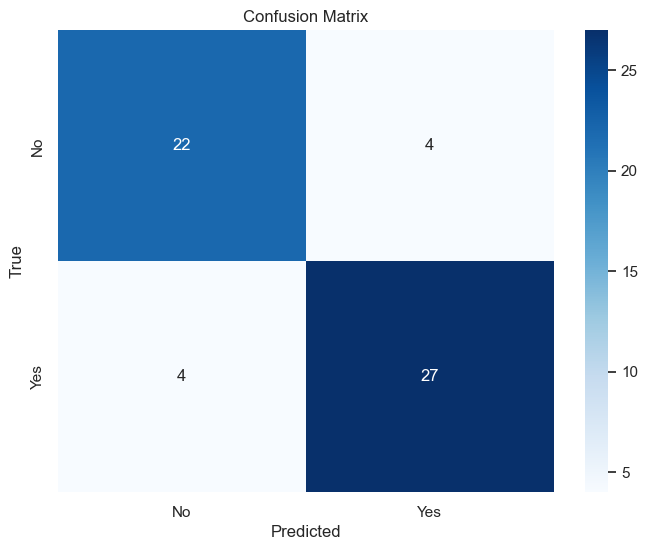

In [160]:
#Bagging Ensemble Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


# Select columns for features and target
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'target'


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(heart[features], heart[target], test_size=0.2, random_state=42)

# Initialize a Decision Tree Classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Initialize a Bagging Classifier
bagging_clf = BaggingClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Evaluate model
Bagging_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Bagging_accuracy)

# Evaluation metrics
met_bag = metrics.classification_report(y_test, y_pred)
print(met_bag)

cm_bag = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        26
           1       0.93      0.81      0.86        31

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.87      0.86      0.86        57



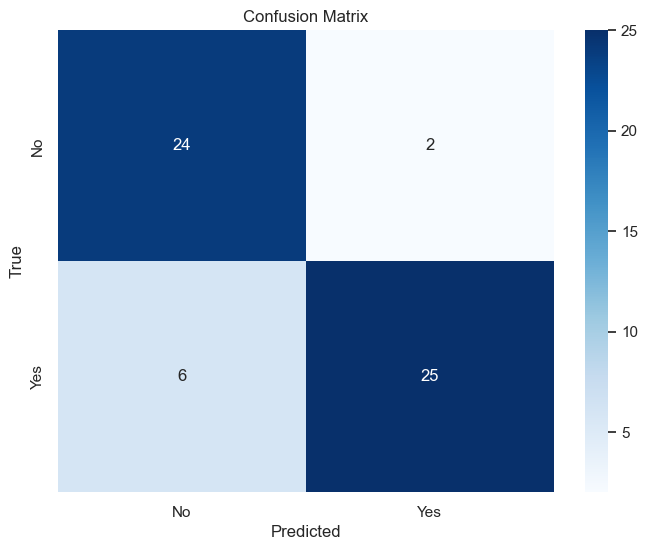

In [161]:
#AdaBoost Clasifier

from sklearn.ensemble import AdaBoostClassifier


# Define features and target variable
X = heart.drop('target', axis=1)
y = heart['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Adaboost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier
adaboost_clf.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
AdaBoost_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {AdaBoost_accuracy:.2f}')

# Evaluation metrics
met_ab = metrics.classification_report(y_test, y_pred)
print(met_ab)

# Plot confusion matrix
cm_ab = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ab, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.7894736842105263
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.81      0.81      0.81        31

    accuracy                           0.79        57
   macro avg       0.79      0.79      0.79        57
weighted avg       0.79      0.79      0.79        57



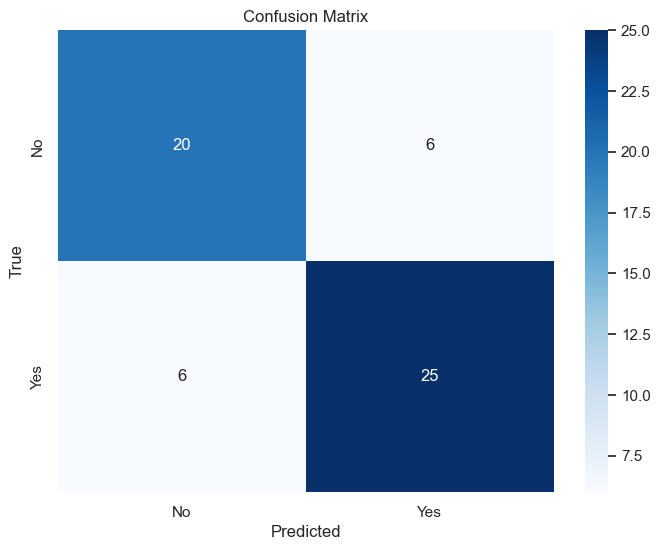

In [162]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
NaiveBayes_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {NaiveBayes_accuracy}')

# Evaluation metrics
met_nb = metrics.classification_report(y_test, y_pred)
print(met_nb)

cm_nb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Conclusion:

I conducted a performance evaluation of seven different machine learning classifiers using a specific dataset
to obtain evaluation metrics. The classifiers analyzed were Decision Tree, SVM Linear,
SVM non-linear(Radial Basis Function), Random Forest, Bagging Ensemble Classifier, Ada Boost Classifier, and Naive Bayes.
Each classifier exhibits unique attributes and effectiveness, depending on the nature of the dataset and the specific
objectives of the analysis.

Here are the performance observations for the classifiers:

1. **Decision Tree** demonstrated a robust accuracy of approximately **0.807**. This model is straightforward and can be highly interpretable but might be prone to overfitting without proper parameter tuning or pruning.

2. **SVM Linear** posted an accuracy of around **0.772**. This model is beneficial for high-dimensional spaces and is effective in cases where there is a clear margin of separation.

3. **SVM non-linear(Radial Basis Function)** had a slightly higher accuracy than its linear counterpart at about **0.789**. This indicates its capability to capture complex patterns in the data, which the linear kernel might miss.

4. **Random Forest** achieved an accuracy of roughly **0.825**. Known for its high accuracy and robustness, it is less likely to overfit than a single decision tree and provides a good indicator of feature importance.

5. **Bagging Ensemble Classifier** recorded an accuracy of about **0.860**. This ensemble approach helps reduce variance and avoids overfitting, typically outperforming a single model approach.

6. **Ada Boost Classifier** also scored a similar high accuracy of **0.860**. It focuses on difficult cases by adapting to the errors of previous models and can enhance the performance of weak classifiers.

7. **Naive Bayes** matched the non-linear SVM in accuracy at approximately **0.789**. It performs well in multi-class predictions and is extremely fast relative to other classifiers, although it assumes feature independence.

In summary, the Bagging Ensemble Classifier and Ada Boost Classifier emerged as the top performers in this evaluation with accuracies close to 0.860, demonstrating their effectiveness in leveraging multiple models to correct errors and reduce overfitting. Each model's choice might still depend on the specific requirements of the dataset and the problem context. Fine-tuning model parameters and selecting appropriate features could potentially enhance these results further.





